# Evolución de los Precios de la Electricidad
===

# Instrucciones

En el archivo `precios.zip`  se encuentran los archivos `Precio_Bolsa_Nacional_($kwh)_ano.xls` en formato de Microsoft Excel, los cuales contienen los precios históricos horarios de la electricidad para el mercado eléctrico Colombiano entre los años 1995 y 2017 en COL-PESOS/kWh. A partir de la información suministrada realice las siguientes actividades. 

**1.--** Lea los archivos y cree una tabla única concatenando la información para cada uno de los años. Debe transformar la tabla de tal forma que quede con las columnas `Fecha`, `Hora` y `Precio` (únicamente tres columnas).

**2.--** Compute e imprima el número de registros con datos faltantes.

**3.--** Compute e imprima el número de registros duplicados.

**4.--** Elimine los registros con datos duplicados o datos faltantes, e imprima la cantidad de registros que quedan (registros completos).

**5.--** Compute y grafique el precio primedio diario.

**6.--** Compute y grafique el precio máximo por mes.

**7.--** Compute y grafique el precio mínimo mensual.

**8.--** Haga un gráfico para comparar el precio máximo del mes (para cada mes) y el precio promedio mensual.

**9.--** Haga un histograma que muestre a que horas se produce el máximo precio diario para los días laborales.

**10.--** Haga un histograma que muestre a que horas se produce el máximo precio diario para los días sabado.

**11.--** Haga un histograma que muestre a que horas se produce el máximo precio diario para los días domingo.

**12.--** Imprima una tabla con la fecha y el valor más bajo por año del precio de bolsa.

**13.--** Haga una gráfica en que se muestre el precio promedio diario y el precio promedio mensual.

---

# Solución

In [2]:
# Libraries

import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from os import listdir
import glob

%matplotlib inline

**1.--** Lea los archivos y cree una tabla única concatenando la información para cada uno de los años. Debe transformar la tabla de tal forma que quede con las columnas `Fecha`, `Hora` y `Precio` (únicamente tres columnas).

In [3]:
path = 'precios/'
files = listdir(path)
file_names = [f'{path}{file}' for file in files if (file.endswith('xls') or file.endswith('xlsx'))]
file_names.sort()

In [4]:
def read_data_file(path):
    '''
    Reads the data from the xlsx files, deleting nan heads values
    '''
    
    index = 0
    data = pd.read_excel(path, skiprows=index)
    data.iloc[:,0] = data.iloc[:,0].astype(str)
    while data.iloc[0,0] != 'Fecha':
        data = pd.read_excel(path, skiprows=index, usecols=list(range(25)))
        data.iloc[:,0] = data.iloc[:,0].astype(str)
        index += 1
    data = pd.read_excel(path, skiprows=index, usecols=list(range(25)))
    data.iloc[:,0] = data.iloc[:,0].astype(str)
    return data


In [5]:
dfs = []
for file in file_names:
    dfs.append(read_data_file(file))
dfs = pd.concat(dfs)

In [6]:
# Pivots hours (columns) as rows
result=pd.melt(dfs,id_vars=['Fecha'], var_name='Hora', value_name='Precio')

# Formats the date
result['Fecha'] = pd.to_datetime(result['Fecha'], format='%Y-%m-%d')
result.tail()

,Fecha,Hora,Precio
201811,2018-05-01,23,64.229226
201812,2018-05-02,23,67.832816
201813,2018-05-03,23,63.710848
201814,2018-05-04,23,64.043453
201815,2018-05-05,23,75.242918


**2.--** Compute e imprima el número de registros con datos faltantes.

In [7]:
result.isnull().sum().sum()

454

In [8]:
result.shape[0]

201816

**3.--** Compute e imprima el número de registros duplicados.

In [9]:
duplicated = result[result.duplicated()]
duplicated.head()

,Fecha,Hora,Precio
531,1996-12-06,0,20.0
532,1996-12-07,0,9.8
533,1996-12-08,0,13.2
534,1996-12-09,0,13.0
535,1996-12-10,0,12.0


In [10]:
number_of_duplicated = duplicated.shape[0]
print(f'registros duplicados: {number_of_duplicated}')


registros duplicados: 1951


**4.--** Elimine los registros con datos duplicados o datos faltantes, e imprima la cantidad de registros que quedan (registros completos).

In [11]:
dfunique = result.copy()
dfunique = dfunique.drop_duplicates()
dfunique = dfunique.dropna()
non_duplicated = dfunique.shape[0]
print(f'registros unicos: {non_duplicated}')

registros unicos: 199819


**5.--** Compute y grafique el precio primedio diario.

In [12]:
df_day = dfunique.copy()
df_day['dia'] =  df_day[['Fecha']].apply(lambda x: dt.datetime.strftime(x['Fecha'], '%A'), axis=1)
df_day = df_day.groupby('dia').apply(np.mean)
df_day

,Precio
dia,
Friday,109.002536
Monday,107.178698
Saturday,105.943442
Sunday,100.252102
Thursday,109.882748
Tuesday,109.527951
Wednesday,110.692152


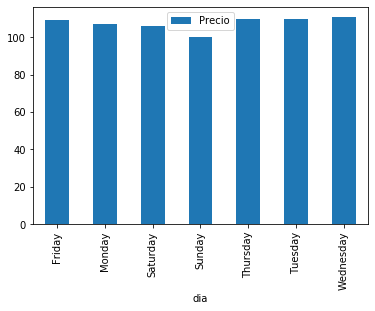

In [13]:
# Draws
df_day.plot(kind='bar')

**6.--** Compute y grafique el precio máximo por mes.

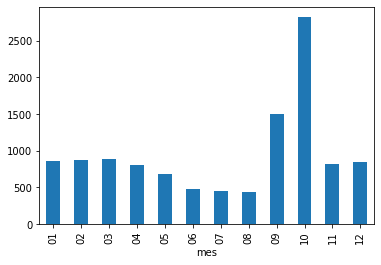

In [14]:
df_month = dfunique.copy()
df_month['mes'] =  df_month[['Fecha']].apply(lambda x: dt.datetime.strftime(x['Fecha'], '%m'), axis=1)
df_month.groupby('mes')['Precio'].apply(np.max).plot(kind='bar')

**7.--** Compute y grafique el precio mínimo mensual.

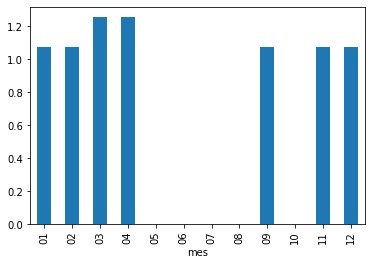

In [15]:
df_month.groupby('mes')['Precio'].apply(np.min).plot(kind='bar')

**8.--** Haga un gráfico para comparar el precio máximo del mes (para cada mes) y el precio promedio mensual.

In [16]:
df_month_compare = pd.DataFrame({'minimo': [], 'maximo': []})
df_month_compare['maximo'] = df_month.groupby('mes')['Precio'].apply(np.max)
df_month_compare['minimo'] = df_month.groupby('mes')['Precio'].apply(np.min)
df_month_compare

,minimo,maximo
mes,,
01,1.073,865.477082
02,1.076,869.442024
03,1.255,884.836657
04,1.254,807.500399
05,0.000,686.494571
06,0.000,474.110743
07,0.000,445.329386
08,0.000,441.242919
09,1.073,1495.042973


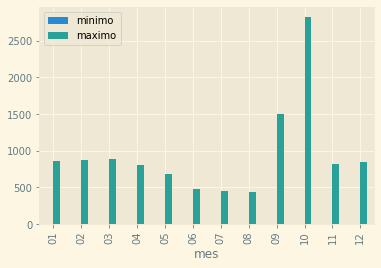

In [17]:
plt.style.use('Solarize_Light2')
df_max = df_month.groupby('mes')['Precio'].apply(np.max)
df_min = df_month.groupby('mes')['Precio'].apply(np.min)
df_month_compare.plot.bar()


<Figure size 2160x1440 with 0 Axes>

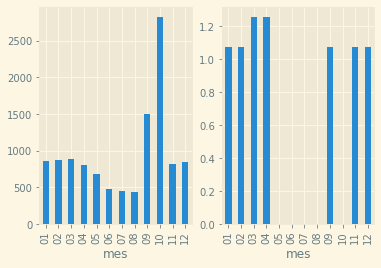

In [18]:
plt.figure(figsize=(30, 20))
fig, axes = plt.subplots(nrows=1, ncols=2)
df_max.plot(kind='bar', ax=axes[0])
df_min.plot(kind='bar', ax=axes[1])

**9.--** Haga un histograma que muestre a que horas se produce el máximo precio diario para los días laborales.

In [19]:
df_day = dfunique.copy()
df_day['dia'] =  df_day[['Fecha']].apply(lambda x: dt.datetime.strftime(x['Fecha'], '%A'), axis=1)
df_day = df_day[~(df_day['dia']=='Saturday')]
df_day = df_day[~(df_day['dia']=='Sunday')]
df_day.sort_values(by=['Fecha','Hora']).reset_index()
df_day.head()

,Fecha,Hora,Precio,dia
1,1995-07-21,0,1.073,Friday
4,1995-07-24,0,1.000,Monday
5,1995-07-25,0,0.990,Tuesday
6,1995-07-26,0,0.500,Wednesday
7,1995-07-27,0,0.500,Thursday


In [20]:
# Date-price dataframe
df_date = df_day.groupby(['Fecha'])['Precio'].max()
df_date.head(10)

Fecha
1995-07-20     2.827
1995-07-21    16.670
1995-07-24    22.500
1995-07-25     1.500
1995-07-26     8.000
1995-07-27     1.500
1995-07-28     1.073
1995-07-31     8.845
1995-08-01    17.000
1995-08-02     1.100
Name: Precio, dtype: float64

Text(0, 0.5, 'Numero de ocurrencias')

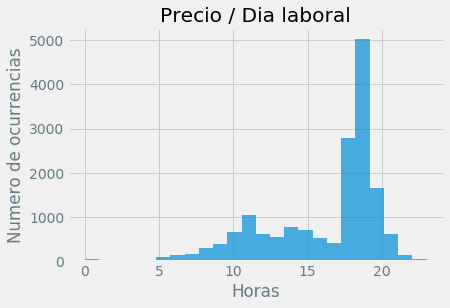

In [21]:
df_merged = pd.merge(df_day, df_date, on=['Fecha','Precio'], how='inner')

df_hours = list(map(int,df_merged['Hora'].tolist()))

plt.style.use('fivethirtyeight')
plt.hist(df_hours, bins=24, alpha=0.7, histtype='bar')
plt.title('Precio / Dia laboral')
plt.xlabel('Horas')
plt.ylabel('Numero de ocurrencias')

**10.--** Haga un histograma que muestre a que horas se produce el máximo precio diario para los días sabado.

Text(0, 0.5, 'Numero de ocurrencias')

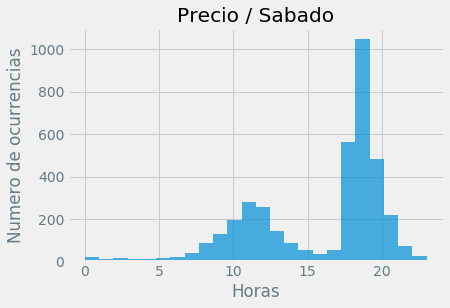

In [22]:
df_day = dfunique.copy()
df_day['dia'] =  df_day[['Fecha']].apply(lambda x: dt.datetime.strftime(x['Fecha'], '%A'), axis=1)
df_day = df_day[~(df_day['dia']!='Saturday')]
df_day.sort_values(by=['Fecha','Hora']).reset_index()
df_day.head()

# Date-price dataframe
df_date = df_day.groupby(['Fecha'])['Precio'].max()
df_date.head(10)

df_merged = pd.merge(df_day, df_date, on=['Fecha','Precio'], how='inner')

df_hours = list(map(int,df_merged['Hora'].tolist()))

plt.style.use('fivethirtyeight')
plt.hist(df_hours, bins=24, alpha=0.7, histtype='bar')
plt.title('Precio / Sabado')
plt.xlabel('Horas')
plt.ylabel('Numero de ocurrencias')

**11.--** Haga un histograma que muestre a que horas se produce el máximo precio diario para los días domingo.

Text(0, 0.5, 'Numero de ocurrencias')

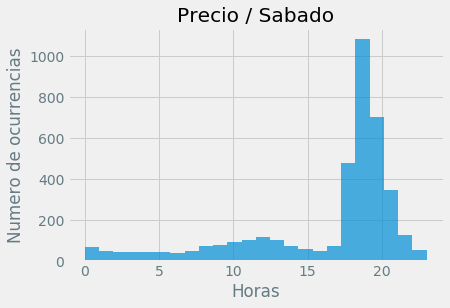

In [23]:
df_day = dfunique.copy()
df_day['dia'] =  df_day[['Fecha']].apply(lambda x: dt.datetime.strftime(x['Fecha'], '%A'), axis=1)
df_day = df_day[~(df_day['dia']!='Sunday')]
df_day.sort_values(by=['Fecha','Hora']).reset_index()
df_day.head()

# Date-price dataframe
df_date = df_day.groupby(['Fecha'])['Precio'].max()
df_date.head(10)

df_merged = pd.merge(df_day, df_date, on=['Fecha','Precio'], how='inner')

df_hours = list(map(int,df_merged['Hora'].tolist()))

plt.style.use('fivethirtyeight')
plt.hist(df_hours, bins=24, alpha=0.7, histtype='bar')
plt.title('Precio / Sabado')
plt.xlabel('Horas')
plt.ylabel('Numero de ocurrencias')

**12.--** Imprima una tabla con la fecha y el valor más bajo por año del precio de bolsa.

In [61]:
df_year = dfunique.copy()
df_year['anio'] =  df_year[['Fecha']].apply(lambda x: dt.datetime.strftime(x['Fecha'], '%Y'), axis=1)

df_group_year = df_year.groupby('anio').agg({'Precio': np.min}) 
df_group_year.reset_index(inplace=True)
df_group_year.columns = ['anio',"min-precio"]
df_group_year.head()

df_merged = pd.merge(df_group_year, df_year, on = ['anio'], how ='inner')
df_merged = df_merged[(df_merged['min-precio'] == df_merged['Precio'])]
df_merged = df_merged[['Fecha','min-precio']].drop_duplicates()
df_merged

,Fecha,min-precio
7,1995-07-28,0.000000
10,1995-07-31,0.000000
11,1995-08-01,0.000000
84,1995-10-13,0.000000
338,1995-07-29,0.000000
339,1995-07-30,0.000000
3800,1995-07-26,0.000000
4140,1996-06-30,0.000000
4149,1996-07-09,0.000000
4152,1996-07-12,0.000000


**13.--** Haga una gráfica en que se muestre el precio promedio diario y el precio promedio mensual.

In [126]:
df = dfunique.copy()
df['day'] =  df_year[['Fecha']].apply(lambda x: dt.datetime.strftime(x['Fecha'], '%A'), axis=1)
df['month'] =  df_year[['Fecha']].apply(lambda x: dt.datetime.strftime(x['Fecha'], '%m'), axis=1)
df_mean_day = df.groupby(['Fecha', 'day'])['Precio'].mean()
df_mean_month = df.groupby(['Fecha', 'month'])['Precio'].mean()

df_merged = pd.merge(df_mean_day, df_mean_month,  how='left', left_on=['Fecha'], right_on = ['Fecha'])

In [130]:
df_merged.head()

,Promedio Diario,Promedio Mensual
Fecha,,
1995-07-20,1.409435,1.409435
1995-07-21,4.924333,4.924333
1995-07-22,1.269500,1.269500
1995-07-23,0.953083,0.953083
1995-07-24,4.305917,4.305917


<Figure size 2000x2000 with 0 Axes>

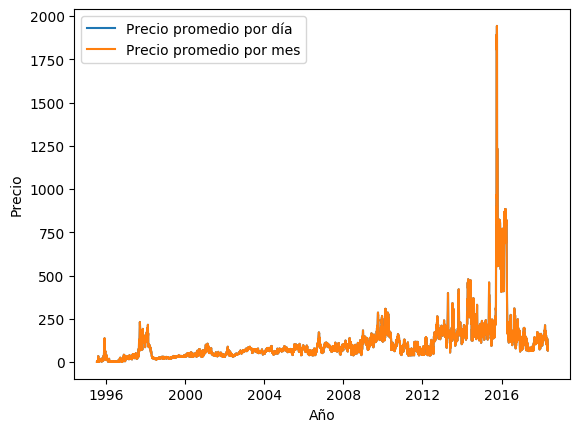

In [131]:
df_merged.columns = ['Promedio Diario', 'Promedio Mensual']

plt.style.use('default')
plt.figure(figsize=(20, 20))
fig, ax = plt.subplots()
ax.plot((df_merged.index.tolist()), df_merged['Promedio Diario'], label="Precio promedio por día")
ax.plot((df_merged.index.tolist()), df_merged['Promedio Mensual'], label="Precio promedio por mes")
plt.xlabel("Año")
plt.ylabel("Precio")

ax.legend()

---